In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] ='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] =False

In [2]:
from tqdm.notebook import tqdm
import time
import re

In [3]:
from konlpy.tag import Okt, Kkma, Komoran

In [4]:
import  nltk

In [5]:
from wordcloud import WordCloud
from PIL import Image

# 데이터 불러오기

In [6]:
data = pd.read_excel('./use_data/[크롤링] 역대_네이버_영화_리뷰_최종_수정.xlsx', engine='openpyxl')
data

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,1,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...,...
7590,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.0,"의미와 재미, 한국영화 어른들의 힘!"
7591,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.0,사법부의 심장을 향해 겨누어진 실화 한방!
7592,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.0,국민배우 안성기 구하기
7593,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.0,"아름다워라, 이것이 선배의 영화"


In [9]:
okt = Okt()
kkma = Kkma()
kr = Komoran()

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

# 필요한 컬럼 추출

In [100]:
msr_list = []
msr_list = data.iloc[:,[1,6,7]]
msr_list

,영화명,별점,리뷰
0,명량,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,8.0,전쟁씬에서 입벌리고봄
...,...,...,...
7590,부러진 화살,7.0,"의미와 재미, 한국영화 어른들의 힘!"
7591,부러진 화살,8.0,사법부의 심장을 향해 겨누어진 실화 한방!
7592,부러진 화살,7.0,국민배우 안성기 구하기
7593,부러진 화살,8.0,"아름다워라, 이것이 선배의 영화"


In [102]:
# 결측치 확인
print(msr_list['리뷰'][msr_list['리뷰'].isnull()])
print(msr_list.isnull().sum())

289     NaN
291     NaN
2788    NaN
6209    NaN
6250    NaN
7024    NaN
7424    NaN
7441    NaN
Name: 리뷰, dtype: object
영화명    0
별점     0
리뷰     8
dtype: int64


In [103]:
# 결측치 제거
msr_list = msr_list.dropna(axis = 0)

In [104]:
msr_list

,영화명,별점,리뷰
0,명량,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,8.0,전쟁씬에서 입벌리고봄
...,...,...,...
7590,부러진 화살,7.0,"의미와 재미, 한국영화 어른들의 힘!"
7591,부러진 화살,8.0,사법부의 심장을 향해 겨누어진 실화 한방!
7592,부러진 화살,7.0,국민배우 안성기 구하기
7593,부러진 화살,8.0,"아름다워라, 이것이 선배의 영화"


# 리뷰 컬럼만 선택

In [106]:
review_list = msr_list.iloc[:,[2]]
review_list

,리뷰
0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,전쟁씬에서 입벌리고봄
...,...
7590,"의미와 재미, 한국영화 어른들의 힘!"
7591,사법부의 심장을 향해 겨누어진 실화 한방!
7592,국민배우 안성기 구하기
7593,"아름다워라, 이것이 선배의 영화"


In [110]:
# 데이터 프레임 형태 리스트로 변환
texts = review_list.values.tolist()
texts

[['오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 영화같습니다. 평소에 영화 많이 좋아하고 자주보는 편인데. 무지 재미있게 봤습니다. 나라 잘지키고 오겠습니다 필승'],
 ['극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가? 평론가들의 평점 6점은 도대체 어떻게 해서 나온 점수인지... 블랙펄 같은 배가 나오고 판옥선이 거북선으로 트랜스포머하는 장면이 나와야 평점이 높아질려나?'],
 ['보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이 특히 압권!!'],
 ['작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 무엇이 필요한지 리더의 마음이 한치의 흔들림없이 무엇을 향하고 있어야 하는지를 세치의 혀가 아닌 온몸으로 400년전 구국의영웅이 2014 우리에게 벅찬 울림을 전한다'],
 ['전쟁씬에서 입벌리고봄'],
 ['우리나라에서도이런해상전투씬이 나오다니 압권이다 더불어 이순신장군님의 위대함까지 다시한번 생각하게하는영화'],
 ['안봤으면 후회할 영화! 안볼수 없었더 영화! 모두가 봤으면 하는 영화!'],
 ['올해 최고의 수작. 성웅 이순신 그는 위대한 조선의 장수'],
 ['장면 하나하나가 소름이고 감동.. ㅜㅜ 이런 영화가 천만이 넘어야함'],
 ['영화보는 동안 줄곧 든 생각 한가지. 정말 고생 많았을듯. 잘보고 감동받고 갑니다.'],
 ['관람내나 감동이었습니다.'],
 ['완전 명작....무조건 봐야됩니다 한국사람이라면'],
 ['김한민 감독님 미리 천만 축하드립니다 ㅎ완전 대박 ㅎ노량도 만들어 주십쇼'],
 ['진부하게 영웅이 왜놈 다쓸어버리는게 아니고 굉장히 사실적이다다시 한번 위인 이순신을 생각해보는 계기가 됨'],
 ['후속작 기대해봅니다 거북선이 너무 보고싶어요'],
 ['나는 오늘 성웅 이순신과 인간 이순신을 보았고 전쟁 영화를 보며 울컥 거린건 너무너무 오랜만인거 같다'],
 ['올해 최고의 영화인 것

In [125]:
# 하나의 리스트로 합치기
text = []
for i in tqdm(range(len(review_list))):
    text = text+texts[i]
print(text)
print(len(text))

  0%|          | 0/7587 [00:00<?, ?it/s]

['오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 영화같습니다. 평소에 영화 많이 좋아하고 자주보는 편인데. 무지 재미있게 봤습니다. 나라 잘지키고 오겠습니다 필승', '극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가? 평론가들의 평점 6점은 도대체 어떻게 해서 나온 점수인지... 블랙펄 같은 배가 나오고 판옥선이 거북선으로 트랜스포머하는 장면이 나와야 평점이 높아질려나?', '보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이 특히 압권!!', '작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 무엇이 필요한지 리더의 마음이 한치의 흔들림없이 무엇을 향하고 있어야 하는지를 세치의 혀가 아닌 온몸으로 400년전 구국의영웅이 2014 우리에게 벅찬 울림을 전한다', '전쟁씬에서 입벌리고봄', '우리나라에서도이런해상전투씬이 나오다니 압권이다 더불어 이순신장군님의 위대함까지 다시한번 생각하게하는영화', '안봤으면 후회할 영화! 안볼수 없었더 영화! 모두가 봤으면 하는 영화!', '올해 최고의 수작. 성웅 이순신 그는 위대한 조선의 장수', '장면 하나하나가 소름이고 감동.. ㅜㅜ 이런 영화가 천만이 넘어야함', '영화보는 동안 줄곧 든 생각 한가지. 정말 고생 많았을듯. 잘보고 감동받고 갑니다.', '관람내나 감동이었습니다.', '완전 명작....무조건 봐야됩니다 한국사람이라면', '김한민 감독님 미리 천만 축하드립니다 ㅎ완전 대박 ㅎ노량도 만들어 주십쇼', '진부하게 영웅이 왜놈 다쓸어버리는게 아니고 굉장히 사실적이다다시 한번 위인 이순신을 생각해보는 계기가 됨', '후속작 기대해봅니다 거북선이 너무 보고싶어요', '나는 오늘 성웅 이순신과 인간 이순신을 보았고 전쟁 영화를 보며 울컥 거린건 너무너무 오랜만인거 같다', '올해 최고의 영화인 것 같습니다.이순신 장군 너무 훌륭하고 위대하시다는걸 이 영화를 통해 다시한번 깨닫게되네요

In [119]:
# 리스트 형태 문자형으로 변환
review_text = ' '.join(a for a in text)
review_text

'오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 영화같습니다. 평소에 영화 많이 좋아하고 자주보는 편인데. 무지 재미있게 봤습니다. 나라 잘지키고 오겠습니다 필승 극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가? 평론가들의 평점 6점은 도대체 어떻게 해서 나온 점수인지... 블랙펄 같은 배가 나오고 판옥선이 거북선으로 트랜스포머하는 장면이 나와야 평점이 높아질려나? 보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이 특히 압권!! 작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 무엇이 필요한지 리더의 마음이 한치의 흔들림없이 무엇을 향하고 있어야 하는지를 세치의 혀가 아닌 온몸으로 400년전 구국의영웅이 2014 우리에게 벅찬 울림을 전한다 전쟁씬에서 입벌리고봄 우리나라에서도이런해상전투씬이 나오다니 압권이다 더불어 이순신장군님의 위대함까지 다시한번 생각하게하는영화 안봤으면 후회할 영화! 안볼수 없었더 영화! 모두가 봤으면 하는 영화! 올해 최고의 수작. 성웅 이순신 그는 위대한 조선의 장수 장면 하나하나가 소름이고 감동.. ㅜㅜ 이런 영화가 천만이 넘어야함 영화보는 동안 줄곧 든 생각 한가지. 정말 고생 많았을듯. 잘보고 감동받고 갑니다. 관람내나 감동이었습니다. 완전 명작....무조건 봐야됩니다 한국사람이라면 김한민 감독님 미리 천만 축하드립니다 ㅎ완전 대박 ㅎ노량도 만들어 주십쇼 진부하게 영웅이 왜놈 다쓸어버리는게 아니고 굉장히 사실적이다다시 한번 위인 이순신을 생각해보는 계기가 됨 후속작 기대해봅니다 거북선이 너무 보고싶어요 나는 오늘 성웅 이순신과 인간 이순신을 보았고 전쟁 영화를 보며 울컥 거린건 너무너무 오랜만인거 같다 올해 최고의 영화인 것 같습니다.이순신 장군 너무 훌륭하고 위대하시다는걸 이 영화를 통해 다시한번 깨닫게되네요.. 누가 도대체 지루하다고 하는거야? 초반의 그 두려움이 느껴지지 않던가요? 전쟁씬은 

# 단어 분리

In [121]:
result = okt.morphs(review_text)
result

['오늘',
 '아침',
 '에',
 '조조',
 '로',
 '보고왔습니다',
 '.',
 '8월',
 '4일',
 '에',
 '해군',
 '에',
 '입대',
 '하는데',
 '.',
 '그',
 '전',
 '에',
 '보기',
 '잘한',
 '영화',
 '같습니다',
 '.',
 '평소',
 '에',
 '영화',
 '많이',
 '좋아하고',
 '자주',
 '보는',
 '편',
 '인데',
 '.',
 '무지',
 '재미있게',
 '봤습니다',
 '.',
 '나라',
 '잘',
 '지키고',
 '오겠습니다',
 '필승',
 '극찬',
 '할',
 '수',
 '는',
 '없지만',
 '이',
 '정도',
 '면',
 '내용',
 ',',
 '영상',
 ',',
 '연출',
 '전부',
 '꽤',
 '나',
 '뛰어난',
 '작품',
 '이지',
 '않은가',
 '?',
 '평론가',
 '들',
 '의',
 '평점',
 '6',
 '점',
 '은',
 '도대체',
 '어떻게',
 '해서',
 '나온',
 '점수',
 '인지',
 '...',
 '블랙펄',
 '같은',
 '배',
 '가',
 '나오고',
 '판옥선',
 '이',
 '거북선',
 '으로',
 '트랜스포머',
 '하는',
 '장면',
 '이',
 '나와야',
 '평점',
 '이',
 '높아질려나',
 '?',
 '보는',
 '내내',
 '가슴',
 '찡하고',
 '울컥',
 '하는',
 '진짜',
 '최고',
 '의',
 '영화',
 'ㅠㅠ',
 '한',
 '순간',
 '도',
 '놓칠',
 '수',
 '없는',
 '해전씬',
 '이',
 '특히',
 '압권',
 '!!',
 '작',
 '금',
 '의',
 '이',
 '시점',
 '에',
 '국가',
 '가',
 '혼란',
 '하고',
 '위태',
 '할수록',
 '국가',
 '를',
 '직',
 '간접',
 '으로',
 '책임지고',
 '있는',
 '리더',
 '에게',
 '무엇',
 '이',
 '필요한지',
 '리더',
 '의',
 '마음',
 

In [122]:
len(result)

183268

# 명사만 추출

In [138]:
results = okt.nouns(review_text)
results

['오늘',
 '아침',
 '조조',
 '해군',
 '입대',
 '전',
 '보기',
 '영화',
 '평소',
 '영화',
 '자주',
 '편',
 '무지',
 '나라',
 '필승',
 '극찬',
 '수',
 '이',
 '정도',
 '내용',
 '영상',
 '연출',
 '전부',
 '꽤',
 '작품',
 '평론가',
 '평점',
 '점',
 '도대체',
 '점수',
 '블랙펄',
 '배',
 '판옥선',
 '거북선',
 '트랜스포머',
 '장면',
 '평점',
 '내내',
 '가슴',
 '진짜',
 '최고',
 '영화',
 '순간',
 '수',
 '해전씬',
 '압권',
 '금',
 '시점',
 '국가',
 '혼란',
 '위태',
 '국가',
 '직',
 '간접',
 '리더',
 '무엇',
 '리더',
 '마음',
 '한치',
 '무엇',
 '향',
 '치의',
 '혀',
 '온몸',
 '구국',
 '영웅',
 '우리',
 '울림',
 '전',
 '전쟁씬',
 '입',
 '봄',
 '우리나라',
 '해상',
 '전투씬',
 '압권',
 '이순신장군',
 '다시',
 '한번',
 '생각',
 '영화',
 '후회',
 '영화',
 '더',
 '영화',
 '모두',
 '영화',
 '올해',
 '최고',
 '수작',
 '성웅',
 '이순신',
 '그',
 '조선',
 '장수',
 '장면',
 '하나',
 '하나',
 '소름',
 '감동',
 '영화',
 '천만이',
 '화보',
 '동안',
 '줄곧',
 '생각',
 '한가지',
 '정말',
 '고생',
 '감동',
 '관람',
 '나',
 '감동',
 '완전',
 '명작',
 '무조건',
 '한국',
 '사람',
 '라면',
 '김한민',
 '감독',
 '미리',
 '천만',
 '축하',
 '완전',
 '대박',
 '노량',
 '쇼',
 '영웅',
 '왜놈',
 '사실',
 '다시',
 '한번',
 '위인',
 '이순신',
 '생각',
 '계기',
 '후속작',
 '기대',
 '거북선',
 '나',
 '오늘',
 '

In [139]:
len(results)

78933

# 영문자, 숫자, 부호 제거(정규화)

In [140]:
results = [re.sub('[^가-힣]', '', result) for result in results]

In [142]:
len(results)

78933

# 시각화

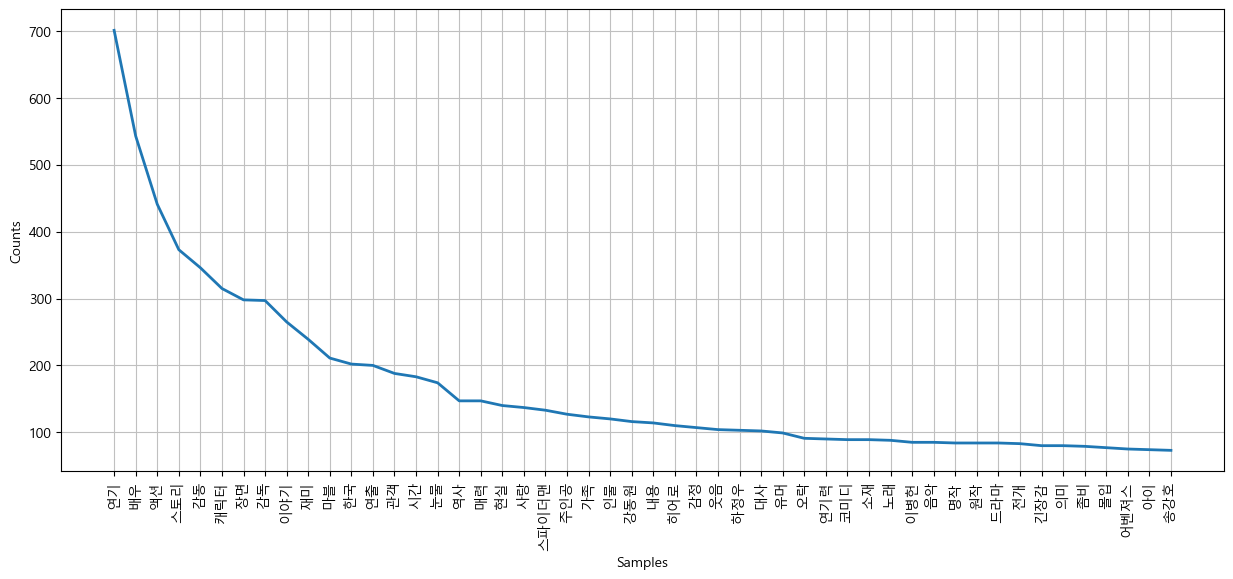

In [204]:
word = nltk.Text(results, name = '리뷰 단어')
plt.figure(figsize=(15,6))
word.plot(50)

plt.show()

In [202]:
# 불용어
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 점 때 말 보고 의 왜 편 정도 역시 다시 마지막 봄 평점 하나 듯 느낌 또 지금 나
볼 좀 내 안 가장 그냥 거 꼭 건 대한 모든 번 우리 속 감 처음 끝 게 중 못 임 이상 다른 개봉 시대 생각 최고 사람 모두
부분 한번 위 기억 은 때문 전 대박 만 뭐 두 힘 돈 함 걸 한국영 자체 조금 눈 위해 완전 도 장르 상황 시작 틀 이해 순간
이유 중간 시리즈 작품 기대 인간 마음 를 개 등 모습 계속 난 영화관 극장 개인 가슴 영상 인상 줄 터 기분 추천 등장 저
내내 무엇 신 존재 이제 여성 사실 물 인생 후반 애 이번 일
'''

In [203]:
# 불용어 적용
stop_words = stoptext.split()
results = [result for result in results if result not in stop_words]

In [216]:
data = word.vocab().most_common(300)

In [212]:
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

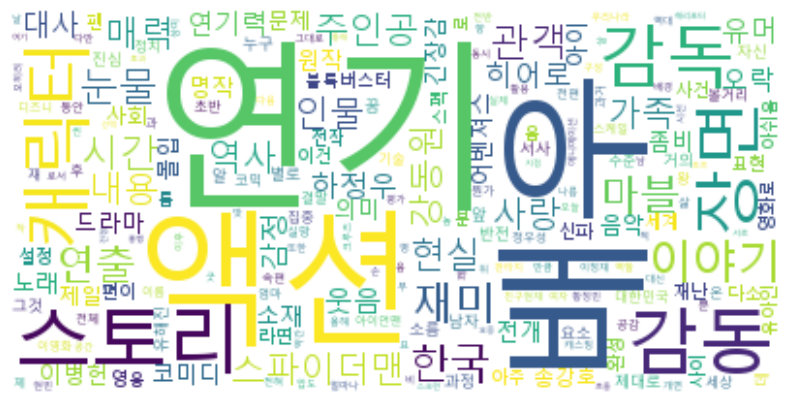

In [217]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 평론가

In [8]:
data

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,1,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...,...
7590,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.0,"의미와 재미, 한국영화 어른들의 힘!"
7591,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.0,사법부의 심장을 향해 겨누어진 실화 한방!
7592,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.0,국민배우 안성기 구하기
7593,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.0,"아름다워라, 이것이 선배의 영화"


In [29]:
# 평론가 데이터 필터링
critic_data = data[(data['구분'] == '평론가')]
critic_data

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
30,1,명량,2014-07-30,명량,2014-07-30,평론가,7.00,캐릭터에 대한 깊이 있는 고찰이나 당대에 대한 역사의식이나 고증의 완벽함에 대한 기...
31,1,명량,2014-07-30,명량,2014-07-30,평론가,6.75,수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 ...
32,1,명량,2014-07-30,명량,2014-07-30,평론가,6.00,해전신은 꽤 볼만하다
33,1,명량,2014-07-30,명량,2014-07-30,평론가,5.00,인물은 흐릿하고 해전만 요란하다
34,1,명량,2014-07-30,명량,2014-07-30,평론가,6.00,"해상 전투는 순류, 나머지는 역류. 반반 무(武) 많이"
...,...,...,...,...,...,...,...,...
7590,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.00,"의미와 재미, 한국영화 어른들의 힘!"
7591,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.00,사법부의 심장을 향해 겨누어진 실화 한방!
7592,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.00,국민배우 안성기 구하기
7593,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.00,"아름다워라, 이것이 선배의 영화"


In [32]:
# 평론가(영화명, 평점, 리뷰)
critic_msr_list = []
critic_msr_list = critic_data.iloc[:,[1,6,7]]
critic_msr_list

,영화명,별점,리뷰
30,명량,7.00,캐릭터에 대한 깊이 있는 고찰이나 당대에 대한 역사의식이나 고증의 완벽함에 대한 기...
31,명량,6.75,수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 ...
32,명량,6.00,해전신은 꽤 볼만하다
33,명량,5.00,인물은 흐릿하고 해전만 요란하다
34,명량,6.00,"해상 전투는 순류, 나머지는 역류. 반반 무(武) 많이"
...,...,...,...
7590,부러진 화살,7.00,"의미와 재미, 한국영화 어른들의 힘!"
7591,부러진 화살,8.00,사법부의 심장을 향해 겨누어진 실화 한방!
7592,부러진 화살,7.00,국민배우 안성기 구하기
7593,부러진 화살,8.00,"아름다워라, 이것이 선배의 영화"


In [33]:
# 결측치 확인
print(critic_msr_list['리뷰'][critic_msr_list['리뷰'].isnull()])
print(critic_msr_list.isnull().sum())

Series([], Name: 리뷰, dtype: object)
영화명    0
별점     0
리뷰     0
dtype: int64


# 평론가 낮은 평점

In [41]:
low_critic_msr_list = critic_msr_list[(data['별점'] <= 5)]
low_critic_msr_list

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11580\1167815203.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_critic_msr_list = critic_msr_list[(data['별점'] <= 5)]


,영화명,별점,리뷰
33,명량,5.0,인물은 흐릿하고 해전만 요란하다
37,명량,5.0,폭발해야 했던 건 배가 아니라 이야기
38,명량,5.0,침몰하는 캐릭터들
77,극한직업,5.0,반은 웃었다만 그다음은?
114,신과함께-죄와 벌,5.0,2부작으로 기획된 시리즈의 첫 번째. 정의로운 망자 김자홍이 7개의 지옥에서 심판을...
...,...,...,...
7446,해리 포터와 불의 잔,5.0,"어차피 그렇게 된 거, 포터와 그의 친구들에게 피와 살을 더 붙이든가"
7482,비긴 어게인,4.0,<원스>는 한번의 요행이었을까?
7516,태풍,5.0,국수주의 계곡에 스스로 갇힌 블록버스터의 욕망
7517,태풍,5.0,"질감 약한 볼거리, 메아리없는 메시지"


# 평론가 리뷰만 선택

In [43]:
low_critic_review_list = low_critic_msr_list.iloc[:,[2]]
low_critic_review_list

,리뷰
33,인물은 흐릿하고 해전만 요란하다
37,폭발해야 했던 건 배가 아니라 이야기
38,침몰하는 캐릭터들
77,반은 웃었다만 그다음은?
114,2부작으로 기획된 시리즈의 첫 번째. 정의로운 망자 김자홍이 7개의 지옥에서 심판을...
...,...
7446,"어차피 그렇게 된 거, 포터와 그의 친구들에게 피와 살을 더 붙이든가"
7482,<원스>는 한번의 요행이었을까?
7516,국수주의 계곡에 스스로 갇힌 블록버스터의 욕망
7517,"질감 약한 볼거리, 메아리없는 메시지"


In [44]:
# 데이터 프레임 형태 리스트로 변환
low_critic_texts = low_critic_review_libst.values.tolist()
low_critic_texts

[['인물은 흐릿하고 해전만 요란하다'],
 ['폭발해야 했던 건 배가 아니라 이야기'],
 ['침몰하는 캐릭터들'],
 ['반은 웃었다만 그다음은?'],
 ['2부작으로 기획된 시리즈의 첫 번째. 정의로운 망자 김자홍이 7개의 지옥에서 심판을 받는 여정을 다룬다. 원작 웹툰과의 비교를 피할 수 없겠지만 우열의 문제는 아니다. 영화는 두 개의 바퀴로 굴러간다. 하나는 지옥을 스크린 위에 구현한 볼거리, 나머지는 가족과 모정이라는 강력한 즉효성 최루탄이다. 서사, 연기, 전개 모두 유기적으로 연결되거나 쌓여가진 않지만 개별 장면들의 효과는 강력하다. 차례대로 즐기는 테마파크 놀이기구를 타고 있는 기분. 눈높이를 낮춘 철저한 공략법을 마냥 무시하긴 어렵다. 어쨌든 확실하게 울린다. 펼쳐보기'],
 ['액션과 청승의 중국화'],
 ['효심은 염라대왕도 춤추게 한다'],
 ['구슬픈 젓가락 장단'],
 ['술술 흘러간다. 그렇다고 술술 받아들이겠다는 건 아니다'],
 ['감격주의로 껴안은 감격시대'],
 ['캐릭터 학대를 통해 얻어낸 눈물의 의미는 뭘까'],
 ['화려하게 얼렁뚱땅'],
 ['자충수가 된 무리수, 곁눈질'],
 ['사기꾼들과 노닐다 웬 애국자 플레이? 그게 이 시대의 코미디'],
 ['2017년 흥행작 <신과함께-죄와 벌>의 속편. 전편의 단점으로 지적됐던 신파를 줄이고 주인공들의 사연에 집중했지만 이야기를 진행하는 방식이 효과적이지 못하다. 캐릭터의 특징을 살리지 못하고 대사와 교차편집으로 전개하다 보니 마동석을 비롯해 배우들의 활약이 제한적이다. 전편의 장점이었던 시각특수효과와 컴퓨터그래픽으로 구현한 지옥의 모습도 2편에서는 이야기를 뒷받침하기보다는 덱스터의 기술력을 전시하는데 머물고 만다. 흥행을 위한 야심만 보일뿐 상업 영화에서 재미와 의미를 ‘함께’ 보고픈 관객의 기대를 소멸시켜 아쉬움이 크고 진하다. 펼쳐보기'],
 ['강력한 배우를 가진 영화가 안이해질 때. 큰 울음이 최선의 애도라 믿을 때'],
 ['지나친 전형성이 실화의 힘까지 잡아먹

In [45]:
# 하나의 리스트로 합치기
low_critic_text = []
for i in tqdm(range(len(low_critic_review_list))):
    low_critic_text = low_critic_text+low_critic_texts[i]
print(low_critic_text)
print(len(low_critic_text))

  0%|          | 0/263 [00:00<?, ?it/s]

['인물은 흐릿하고 해전만 요란하다', '폭발해야 했던 건 배가 아니라 이야기', '침몰하는 캐릭터들', '반은 웃었다만 그다음은?', '2부작으로 기획된 시리즈의 첫 번째. 정의로운 망자 김자홍이 7개의 지옥에서 심판을 받는 여정을 다룬다. 원작 웹툰과의 비교를 피할 수 없겠지만 우열의 문제는 아니다. 영화는 두 개의 바퀴로 굴러간다. 하나는 지옥을 스크린 위에 구현한 볼거리, 나머지는 가족과 모정이라는 강력한 즉효성 최루탄이다. 서사, 연기, 전개 모두 유기적으로 연결되거나 쌓여가진 않지만 개별 장면들의 효과는 강력하다. 차례대로 즐기는 테마파크 놀이기구를 타고 있는 기분. 눈높이를 낮춘 철저한 공략법을 마냥 무시하긴 어렵다. 어쨌든 확실하게 울린다. 펼쳐보기', '액션과 청승의 중국화', '효심은 염라대왕도 춤추게 한다', '구슬픈 젓가락 장단', '술술 흘러간다. 그렇다고 술술 받아들이겠다는 건 아니다', '감격주의로 껴안은 감격시대', '캐릭터 학대를 통해 얻어낸 눈물의 의미는 뭘까', '화려하게 얼렁뚱땅', '자충수가 된 무리수, 곁눈질', '사기꾼들과 노닐다 웬 애국자 플레이? 그게 이 시대의 코미디', '2017년 흥행작 <신과함께-죄와 벌>의 속편. 전편의 단점으로 지적됐던 신파를 줄이고 주인공들의 사연에 집중했지만 이야기를 진행하는 방식이 효과적이지 못하다. 캐릭터의 특징을 살리지 못하고 대사와 교차편집으로 전개하다 보니 마동석을 비롯해 배우들의 활약이 제한적이다. 전편의 장점이었던 시각특수효과와 컴퓨터그래픽으로 구현한 지옥의 모습도 2편에서는 이야기를 뒷받침하기보다는 덱스터의 기술력을 전시하는데 머물고 만다. 흥행을 위한 야심만 보일뿐 상업 영화에서 재미와 의미를 ‘함께’ 보고픈 관객의 기대를 소멸시켜 아쉬움이 크고 진하다. 펼쳐보기', '강력한 배우를 가진 영화가 안이해질 때. 큰 울음이 최선의 애도라 믿을 때', '지나친 전형성이 실화의 힘까지 잡아먹는다', '악다구니와 어리광의 쓰나미', '이쯤 되면 독한 이별 예행연습이다. 애초에 가

In [47]:
# 리스트 형태 문자형으로 변환
low_critic_review_text = ' '.join(a for a in low_critic_text)
low_critic_review_text

"인물은 흐릿하고 해전만 요란하다 폭발해야 했던 건 배가 아니라 이야기 침몰하는 캐릭터들 반은 웃었다만 그다음은? 2부작으로 기획된 시리즈의 첫 번째. 정의로운 망자 김자홍이 7개의 지옥에서 심판을 받는 여정을 다룬다. 원작 웹툰과의 비교를 피할 수 없겠지만 우열의 문제는 아니다. 영화는 두 개의 바퀴로 굴러간다. 하나는 지옥을 스크린 위에 구현한 볼거리, 나머지는 가족과 모정이라는 강력한 즉효성 최루탄이다. 서사, 연기, 전개 모두 유기적으로 연결되거나 쌓여가진 않지만 개별 장면들의 효과는 강력하다. 차례대로 즐기는 테마파크 놀이기구를 타고 있는 기분. 눈높이를 낮춘 철저한 공략법을 마냥 무시하긴 어렵다. 어쨌든 확실하게 울린다. 펼쳐보기 액션과 청승의 중국화 효심은 염라대왕도 춤추게 한다 구슬픈 젓가락 장단 술술 흘러간다. 그렇다고 술술 받아들이겠다는 건 아니다 감격주의로 껴안은 감격시대 캐릭터 학대를 통해 얻어낸 눈물의 의미는 뭘까 화려하게 얼렁뚱땅 자충수가 된 무리수, 곁눈질 사기꾼들과 노닐다 웬 애국자 플레이? 그게 이 시대의 코미디 2017년 흥행작 <신과함께-죄와 벌>의 속편. 전편의 단점으로 지적됐던 신파를 줄이고 주인공들의 사연에 집중했지만 이야기를 진행하는 방식이 효과적이지 못하다. 캐릭터의 특징을 살리지 못하고 대사와 교차편집으로 전개하다 보니 마동석을 비롯해 배우들의 활약이 제한적이다. 전편의 장점이었던 시각특수효과와 컴퓨터그래픽으로 구현한 지옥의 모습도 2편에서는 이야기를 뒷받침하기보다는 덱스터의 기술력을 전시하는데 머물고 만다. 흥행을 위한 야심만 보일뿐 상업 영화에서 재미와 의미를 ‘함께’ 보고픈 관객의 기대를 소멸시켜 아쉬움이 크고 진하다. 펼쳐보기 강력한 배우를 가진 영화가 안이해질 때. 큰 울음이 최선의 애도라 믿을 때 지나친 전형성이 실화의 힘까지 잡아먹는다 악다구니와 어리광의 쓰나미 이쯤 되면 독한 이별 예행연습이다. 애초에 가장 큰 관심사였던 히어로 중 누가 떠날 것인가는 무의미하게 만든 충격요법은 어벤져스의 세대교체와 히

# 단어 분리

In [49]:
low_critic_result = okt.morphs(low_critic_review_text)
low_critic_result

['인물',
 '은',
 '흐릿',
 '하고',
 '해전',
 '만',
 '요란하다',
 '폭발',
 '해야',
 '했던',
 '건',
 '배',
 '가',
 '아니라',
 '이야기',
 '침몰',
 '하는',
 '캐릭터',
 '들',
 '반',
 '은',
 '웃었다만',
 '그다음',
 '은',
 '?',
 '2',
 '부작',
 '으로',
 '기획',
 '된',
 '시리즈',
 '의',
 '첫',
 '번째',
 '.',
 '정의',
 '로운',
 '망',
 '자',
 '김자',
 '홍',
 '이',
 '7',
 '개',
 '의',
 '지옥',
 '에서',
 '심판',
 '을',
 '받는',
 '여정',
 '을',
 '다룬다',
 '.',
 '원작',
 '웹툰',
 '과의',
 '비교',
 '를',
 '피',
 '할',
 '수',
 '없겠지만',
 '우열',
 '의',
 '문제',
 '는',
 '아니다',
 '.',
 '영화',
 '는',
 '두',
 '개',
 '의',
 '바퀴',
 '로',
 '굴러간다',
 '.',
 '하나',
 '는',
 '지옥',
 '을',
 '스크린',
 '위',
 '에',
 '구현',
 '한',
 '볼거리',
 ',',
 '나머지',
 '는',
 '가족',
 '과',
 '모정',
 '이라는',
 '강력한',
 '즉효',
 '성',
 '최루탄',
 '이다',
 '.',
 '서사',
 ',',
 '연기',
 ',',
 '전개',
 '모두',
 '유기',
 '적',
 '으로',
 '연결',
 '되거나',
 '쌓여가진',
 '않지만',
 '개별',
 '장면',
 '들',
 '의',
 '효과',
 '는',
 '강력하다',
 '.',
 '차례대로',
 '즐기는',
 '테마',
 '파크',
 '놀이기구',
 '를',
 '타고',
 '있는',
 '기분',
 '.',
 '눈높이',
 '를',
 '낮춘',
 '철저한',
 '공략',
 '법',
 '을',
 '마냥',
 '무시',
 '하긴',
 '어렵다',
 '.',
 '어쨌든',
 '확실하게',
 

# 명사만 추출

In [50]:
low_critic_results = okt.nouns(low_critic_review_text)
low_critic_results

['인물',
 '흐릿',
 '해전',
 '폭발',
 '건',
 '배',
 '이야기',
 '침몰',
 '캐릭터',
 '반',
 '그다음',
 '부작',
 '기획',
 '시리즈',
 '첫',
 '정의',
 '망',
 '김자',
 '홍',
 '개',
 '지옥',
 '심판',
 '여정',
 '원작',
 '웹툰',
 '비교',
 '피',
 '수',
 '우열',
 '문제',
 '영화',
 '두',
 '개',
 '바퀴',
 '하나',
 '지옥',
 '스크린',
 '위',
 '구현',
 '볼거리',
 '나머지',
 '가족',
 '모정',
 '즉효',
 '최루탄',
 '서사',
 '연기',
 '전개',
 '모두',
 '유기',
 '연결',
 '개별',
 '장면',
 '효과',
 '차례대로',
 '테마',
 '파크',
 '놀이기구',
 '타고',
 '기분',
 '눈높이',
 '공략',
 '법',
 '마냥',
 '무시',
 '어쨌든',
 '린다',
 '보기',
 '액션',
 '청승',
 '중국화',
 '효심',
 '염라대왕',
 '구',
 '젓가락',
 '장단',
 '술술',
 '술술',
 '건',
 '감격',
 '주의',
 '감격시대',
 '캐릭터',
 '학대',
 '통해',
 '눈물',
 '의미',
 '뭘',
 '얼렁뚱땅',
 '자충수',
 '무리수',
 '곁눈질',
 '사기꾼',
 '노닐다',
 '웬',
 '애국자',
 '플레이',
 '그게',
 '이',
 '시대',
 '코미디',
 '흥행',
 '작',
 '신',
 '죄',
 '벌',
 '의',
 '속편',
 '전편',
 '단점',
 '지적',
 '신파',
 '줄',
 '주인공',
 '사연',
 '집중',
 '이야기',
 '진행',
 '방식',
 '효과',
 '캐릭터',
 '특징',
 '못',
 '대사',
 '교차',
 '편집',
 '전개',
 '마동석',
 '비롯',
 '배우',
 '활약',
 '제한',
 '전편',
 '장점',
 '특수',
 '효과',
 '컴퓨터그래픽',
 '구현',
 '지옥',
 '모습',
 '편',


# 정규화

In [51]:
low_critic_results = [re.sub('[^가-힣]', '', low_critic_result) for low_critic_result in low_critic_results]

In [52]:
low_critic_results

['인물',
 '흐릿',
 '해전',
 '폭발',
 '건',
 '배',
 '이야기',
 '침몰',
 '캐릭터',
 '반',
 '그다음',
 '부작',
 '기획',
 '시리즈',
 '첫',
 '정의',
 '망',
 '김자',
 '홍',
 '개',
 '지옥',
 '심판',
 '여정',
 '원작',
 '웹툰',
 '비교',
 '피',
 '수',
 '우열',
 '문제',
 '영화',
 '두',
 '개',
 '바퀴',
 '하나',
 '지옥',
 '스크린',
 '위',
 '구현',
 '볼거리',
 '나머지',
 '가족',
 '모정',
 '즉효',
 '최루탄',
 '서사',
 '연기',
 '전개',
 '모두',
 '유기',
 '연결',
 '개별',
 '장면',
 '효과',
 '차례대로',
 '테마',
 '파크',
 '놀이기구',
 '타고',
 '기분',
 '눈높이',
 '공략',
 '법',
 '마냥',
 '무시',
 '어쨌든',
 '린다',
 '보기',
 '액션',
 '청승',
 '중국화',
 '효심',
 '염라대왕',
 '구',
 '젓가락',
 '장단',
 '술술',
 '술술',
 '건',
 '감격',
 '주의',
 '감격시대',
 '캐릭터',
 '학대',
 '통해',
 '눈물',
 '의미',
 '뭘',
 '얼렁뚱땅',
 '자충수',
 '무리수',
 '곁눈질',
 '사기꾼',
 '노닐다',
 '웬',
 '애국자',
 '플레이',
 '그게',
 '이',
 '시대',
 '코미디',
 '흥행',
 '작',
 '신',
 '죄',
 '벌',
 '의',
 '속편',
 '전편',
 '단점',
 '지적',
 '신파',
 '줄',
 '주인공',
 '사연',
 '집중',
 '이야기',
 '진행',
 '방식',
 '효과',
 '캐릭터',
 '특징',
 '못',
 '대사',
 '교차',
 '편집',
 '전개',
 '마동석',
 '비롯',
 '배우',
 '활약',
 '제한',
 '전편',
 '장점',
 '특수',
 '효과',
 '컴퓨터그래픽',
 '구현',
 '지옥',
 '모습',
 '편',


# 시각화

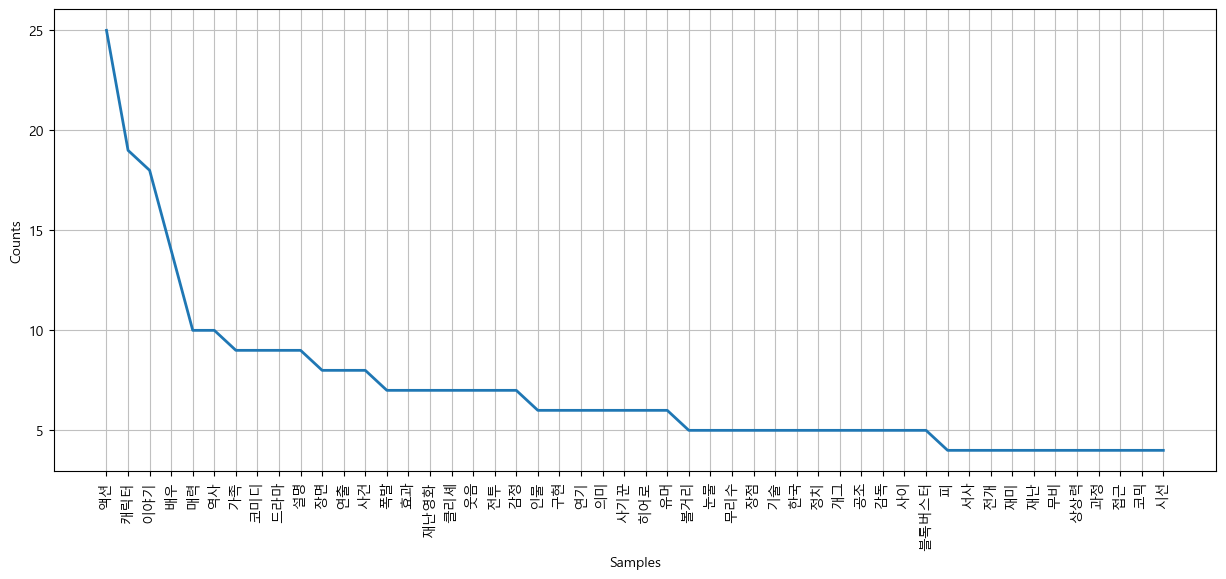

In [79]:
word = nltk.Text(low_critic_results, name = '리뷰 단어')
plt.figure(figsize=(15,6))
word.plot(50)

plt.show()

In [77]:
# 불용어
low_critic_stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 점 때 말 보고 의 왜 편 정도 역시 다시 마지막 봄 평점 하나 듯 느낌 또 지금 나
볼 좀 내 안 가장 그냥 거 꼭 건 대한 모든 번 우리 속 감 처음 끝 게 중 못 임 이상 다른 개봉 시대 생각 최고 사람 모두
부분 한번 위 기억 은 때문 전 대박 만 뭐 두 힘 돈 함 걸 한국영 자체 조금 눈 위해 완전 도 장르 상황 시작 틀 이해 순간
이유 중간 시리즈 작품 기대 인간 마음 를 개 등 모습 계속 난 영화관 극장 개인 가슴 영상 인상 줄 터 기분 추천 등장 저
내내 무엇 신 존재 이제 여성 사실 물 인생 후반 애 이번 일 문제 전편 다소 법 주의 몇몇 스펙 관객 테마 흥행 신파 뿐
요소 여러 활용 맛 로서 성과 맥
'''

In [78]:
# 불용어 적용
low_critic_stop_words = low_critic_stoptext.split()
low_critic_results = [result for result in low_critic_results if result not in low_critic_stop_words]

In [80]:
low_critic_data = word.vocab().most_common(300)

In [81]:
font_path = r"C:\Windows\Fonts\malgun.ttf"
low_critic_wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(low_critic_data))

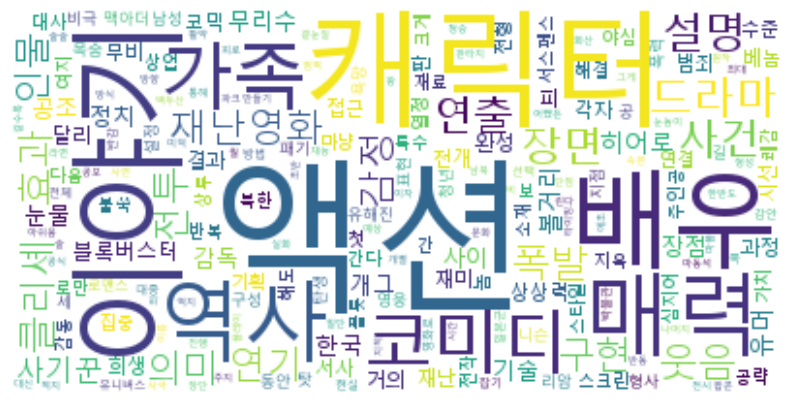

In [82]:
plt.figure(figsize=(10,6))
plt.imshow(low_critic_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 평론가 전체

In [ ]:
# 평론가 리뷰만 추출
critic_data
critic_review_list = critic_msr_list.iloc[:,[2]]

In [ ]:
# 데이터 프레임 형태 리스트로 변환
critic_texts = critic_review_libst.values.tolist()

In [ ]:
# 하나의 리스트로 합치기
for i in tqdm(range(len(critic_review_list))):
    critic_text = critic_text+critic_texts[i]
print(critic_text)
print(len(critic_text))

In [ ]:
# 리스트 형태 문자형으로 변환
critic_review_text = ' '.join(a for a in critic_text)
critic_review_text

# 단어 추출

In [ ]:
critic_result = okt.morphs(critic_review_text)
critic_result

In [ ]:
critic_results = okt.nouns(critic_review_text)
critic_results

# 정규화

In [ ]:
critic_results = [re.sub('[^가-힣]', '', critic_result) for critic_result in critic_results]

# 시각화

In [ ]:
word = nltk.Text(critic_results, name = '리뷰 단어')
plt.figure(figsize=(15,6))
word.plot(50)

plt.show()

# 불용어

In [ ]:
# 불용어
critic_stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 점 때 말 보고 의 왜 편 정도 역시 다시 마지막 봄 평점 하나 듯 느낌 또 지금 나
볼 좀 내 안 가장 그냥 거 꼭 건 대한 모든 번 우리 속 감 처음 끝 게 중 못 임 이상 다른 개봉 시대 생각 최고 사람 모두
부분 한번 위 기억 은 때문 전 대박 만 뭐 두 힘 돈 함 걸 한국영 자체 조금 눈 위해 완전 도 장르 상황 시작 틀 이해 순간
이유 중간 시리즈 작품 기대 인간 마음 를 개 등 모습 계속 난 영화관 극장 개인 가슴 영상 인상 줄 터 기분 추천 등장 저
내내 무엇 신 존재 이제 여성 사실 물 인생 후반 애 이번 일 문제 전편 다소 법 주의 몇몇 스펙 관객 테마 흥행 신파 뿐
요소 여러 활용 맛 로서 성과 맥
'''

In [ ]:
# 불용어 적용
critic_stop_words = critic_stoptext.split()
critic_results = [result for result in critic_results if result not in critic_stop_words]

In [ ]:
critic_data = word.vocab().most_common(300)

In [ ]:
font_path = r"C:\Windows\Fonts\malgun.ttf"
critic_wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(critic_data))

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(critic_wc, interpolation='bilinear')
plt.axis('off')
plt.show()